# **Import Library**

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


# **Pengambilan Dataset MNIST**

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Shape data training:", x_train.shape)
print("Shape data testing :", x_test.shape)


Shape data training: (60000, 28, 28)
Shape data testing : (10000, 28, 28)


# **Preprocessing Data**

In [8]:
# Normalisasi (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding label
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


# **Pembuatan Model Neural Network**

In [9]:
model = Sequential([
    Flatten(input_shape=(28, 28)),   # Ubah gambar ke vektor 1D
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output 10 kelas (0–9)
])


# **Proses Compile Model**

In [10]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

# **Proses Training Model**

In [11]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7987 - loss: 0.7082 - val_accuracy: 0.9492 - val_loss: 0.1801
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9489 - loss: 0.1719 - val_accuracy: 0.9585 - val_loss: 0.1372
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9667 - loss: 0.1122 - val_accuracy: 0.9658 - val_loss: 0.1136
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9752 - loss: 0.0869 - val_accuracy: 0.9697 - val_loss: 0.1005
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9814 - loss: 0.0658 - val_accuracy: 0.9712 - val_loss: 0.0921
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9853 - loss: 0.0502 - val_accuracy: 0.9730 - val_loss: 0.0911
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9866 - loss: 0.0443 - val_accuracy: 0.9719 - val_loss: 0.0923
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9909 - loss: 0.0320 - val_accuracy: 0.

# **Evaluasi Model**

In [12]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9713 - loss: 0.1001
Test Accuracy: 0.9747999906539917


# **Visualisasi Hasil Training**

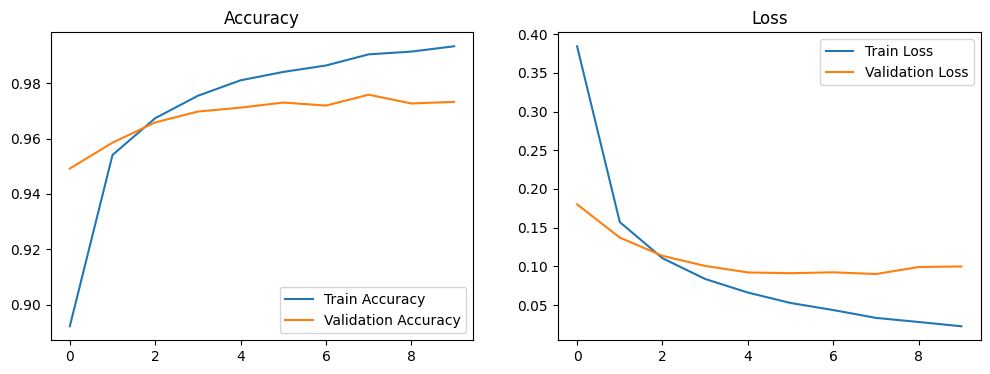

In [13]:
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


# **Prediksi Model**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


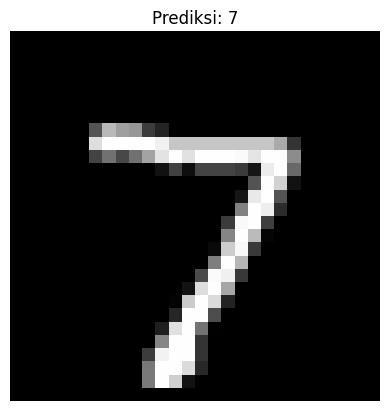

In [14]:
pred = model.predict(x_test)

plt.imshow(x_test[0], cmap='gray')
plt.title(f"Prediksi: {np.argmax(pred[0])}")
plt.axis('off')
plt.show()
